# Loan Application Status Prediction

Project Description


This dataset includes details of applicants who have applied for loan. The dataset includes details like credit history, loan amount, their income, dependents etc. 
Independent Variables:
1.	Loan_ID - This refer to the unique identifier of the applicant's affirmed purchases
2.	Gender - This refers to either of the two main categories (male and female) into which applicants are divided on the basis of their reproductive functions
3.	Married - This refers to applicant being in a state of matrimony
4.	Dependents - This refres to persons who depends on the applicants for survival
5.	Education - This refers to number of years in which applicant received systematic instruction, especially at a school or university
6.	Self_Employed - This refers to applicant working for oneself as a freelancer or the owner of a business rather than for an employer
7.	Applicant Income - This refers to disposable income available for the applicant's use under State law.
8.	CoapplicantIncome - This refers to disposable income available for the people that participate in the loan application process alongside the main applicant use under State law.
9.	Loan_Amount - This refers to the amount of money an applicant owe at any given time.
10.	Loan_Amount_Term - This refers to the duaration in which the loan is availed to the applicant
11.	Credit History - This refers to a record of applicant's ability to repay debts and demonstrated responsibility in repaying them.
12.	Property_Area - This refers to the total area within the boundaries of the property as set out in Schedule.
13.	Loan_Status - This refres to whether applicant is eligible to be availed the Loan requested


In [59]:
# importing the dependencies
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')

In [136]:
# loading the dataset
loan_df=pd.read_csv('loan_prediction.csv')

In [137]:
# printing the first five lines from dataset
loan_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [138]:
# number of rows and columns in the dataset
loan_df.shape

(614, 13)

here there are 614 rows and 13 columns in the dataset

In [139]:
# Statistical measures of dataset
loan_df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [140]:
# number of missing values in each column in dataset
loan_df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

Here we can see there 7 columns are having null values or missing values

In [141]:
# label encoding replacing the values in the loan status column
loan_df.replace({"Loan_Status":{'Y':1,'N':0}},inplace=True)

In [142]:
loan_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,1
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1


Here we can see the changes made in the loan status column we have replaced 'Y'-> 1   and 'N'->  0

In [143]:
# Loan dependent values column
loan_df['Dependents'].value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

here 0 - it is not dependent at all
     1 - it is dependent on single parameter and so on

In [144]:
# replacing the 3+ values by considering it as 4 for further classification
loan_df=loan_df.replace(to_replace='3+',value=4)

In [145]:
# Rechecking the values in  Loan dependent values column
loan_df['Dependents'].value_counts()

0    345
1    102
2    101
4     51
Name: Dependents, dtype: int64

Here we have replaced 3+ with 4 successfully

Data visualization


<AxesSubplot:xlabel='Education', ylabel='count'>

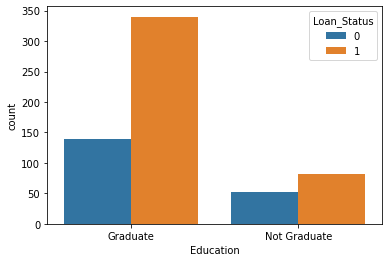

In [146]:
# Education and Loan Status
sns.countplot(x='Education',hue='Loan_Status',data=loan_df
             )

here we can see the graudate candidate is having higher chances of loan approval as comparte ot non graduate


<AxesSubplot:xlabel='Married', ylabel='count'>

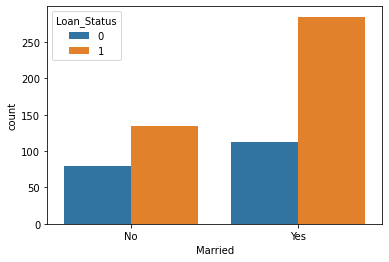

In [147]:
# marital status and loan status
sns.countplot(x='Married',hue='Loan_Status',data=loan_df)

Here from the above plot we come accross that married gets most of the approval of loan

<AxesSubplot:xlabel='Gender', ylabel='count'>

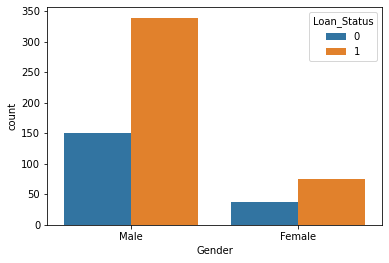

In [148]:
# Gender and loan status
sns.countplot(x='Gender',hue='Loan_Status',data=loan_df)

from the above plot we can conclude that male can get higher approval than female

<AxesSubplot:xlabel='Self_Employed', ylabel='count'>

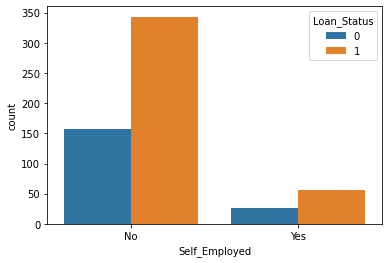

In [149]:
# self employeed and loan status
sns.countplot(x='Self_Employed',hue='Loan_Status',data=loan_df)

<AxesSubplot:xlabel='Property_Area', ylabel='count'>

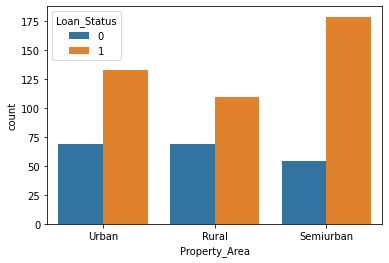

In [150]:
# property area and loan status
sns.countplot(x='Property_Area',hue='Loan_Status',data=loan_df)

from the above plot we come accross, the semiurban property area can have more approval than other areas

In [151]:
# converting categorial columns to numerical values
loan_df.replace({"Dependents":{'0':0,'1':1,'2':2,'4':4},"Gender":{'Male':1,'Female':0},'Married':{'Yes':1,'No':0},'Education':{'Graduate':1,'Not Graduate':0},'Self_Employed':{'Yes':1,'No':0},
                'Property_Area':{'Urban':2,'Rural':0,'Semiurban':1}},inplace=True)

In [152]:
loan_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1.0,0.0,0.0,1,0.0,5849,0.0,NaN,360.0,1.0,2,1
1,LP001003,1.0,1.0,1.0,1,0.0,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,1.0,1.0,0.0,1,1.0,3000,0.0,66.0,360.0,1.0,2,1
3,LP001006,1.0,1.0,0.0,0,0.0,2583,2358.0,120.0,360.0,1.0,2,1
4,LP001008,1.0,0.0,0.0,1,0.0,6000,0.0,141.0,360.0,1.0,2,1


In [170]:
loan_df.dtypes


Loan_ID               object
Gender               float64
Married              float64
Dependents           float64
Education              int64
Self_Employed        float64
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area          int64
Loan_Status            int64
dtype: object

In [171]:
loan_df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [179]:
# replacing the empty values with nan values
loan_df.replace(to_replace=' ',value=np.nan)
loan_df.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1.0,0.0,0.0,1,0.0,5849,0.0,NaN,360.0,1.0,2,1
1,LP001003,1.0,1.0,1.0,1,0.0,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,1.0,1.0,0.0,1,1.0,3000,0.0,66.0,360.0,1.0,2,1
3,LP001006,1.0,1.0,0.0,0,0.0,2583,2358.0,120.0,360.0,1.0,2,1
4,LP001008,1.0,0.0,0.0,1,0.0,6000,0.0,141.0,360.0,1.0,2,1
5,LP001011,1.0,1.0,2.0,1,1.0,5417,4196.0,267.0,360.0,1.0,2,1
6,LP001013,1.0,1.0,0.0,0,0.0,2333,1516.0,95.0,360.0,1.0,2,1
7,LP001014,1.0,1.0,4.0,1,0.0,3036,2504.0,158.0,360.0,0.0,1,0
8,LP001018,1.0,1.0,2.0,1,0.0,4006,1526.0,168.0,360.0,1.0,2,1
9,LP001020,1.0,1.0,1.0,1,0.0,12841,10968.0,349.0,360.0,1.0,1,0


In [180]:
loan_df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [183]:
#removing the drops with null values
loan_df.dropna(inplace=True)

In [184]:
loan_df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [185]:

# separating the data for processing
x=loan_df.drop(columns=['Loan_ID','Loan_Status'],axis=1)
y=loan_df['Loan_Status']

In [186]:
print(x)
print(y)

     Gender  Married  Dependents  Education  Self_Employed  ApplicantIncome  \
1       1.0      1.0         1.0          1            0.0             4583   
2       1.0      1.0         0.0          1            1.0             3000   
3       1.0      1.0         0.0          0            0.0             2583   
4       1.0      0.0         0.0          1            0.0             6000   
5       1.0      1.0         2.0          1            1.0             5417   
..      ...      ...         ...        ...            ...              ...   
609     0.0      0.0         0.0          1            0.0             2900   
610     1.0      1.0         4.0          1            0.0             4106   
611     1.0      1.0         1.0          1            0.0             8072   
612     1.0      1.0         2.0          1            0.0             7583   
613     0.0      0.0         0.0          1            1.0             4583   

     CoapplicantIncome  LoanAmount  Loan_Amount_Ter

Train Test split

In [187]:
X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.1,stratify=y,random_state=2)

In [188]:
print(x.shape,X_train.shape,X_test.shape)

(480, 11) (432, 11) (48, 11)


Training the model


here we are goin to use support vector model

In [189]:
classifier=svm.SVC(kernel='linear')

In [190]:
# training the Support vector machine model
classifier.fit(X_train,Y_train)

SVC(kernel='linear')

In [191]:
#Model evalaution for train data
X_train_prediction=classifier.predict(X_train)
training_accuracy=accuracy_score(X_train_prediction,Y_train)

In [192]:
print("Accuracy in training data: ",training_accuracy)

Accuracy in training data:  0.7986111111111112


In [193]:
# model accuracy for test data
X_test_prediction=classifier.predict(X_test)
training_accuracy=accuracy_score(X_test_prediction,Y_test)

In [194]:
print("Accuracy in test data: ",training_accuracy)

Accuracy in test data:  0.8333333333333334


In [197]:
input_data=(1.0,1.0,0.0,1,1.0,3000,0.0,66.0,360.0,1.0,2)

# changing input_data to numpy_array
input_data_as_numpy_array=np.asarray(input_data)

#reshaping the data as we are predicting the label for only one instance

input_data_reshaped=input_data_as_numpy_array.reshape(1,-1)

prediction=classifier.predict(input_data_reshaped)

print(prediction)

if(prediction==1):
    print('Yes Loan can be approved')
else:
    print("No loan can't be aproved")

[1]
Yes Loan can be approved
